5
4
原始矩阵: [[5 3 0 1]
 [4 0 0 1]
 [1 1 0 5]
 [1 0 0 4]
 [0 1 5 4]]
经过MF后: [[ 5.12687703  1.90046164 -0.73061564  1.57002132]
 [ 3.43081502  1.27769981 -0.46352688  1.09465695]
 [ 1.5580641   1.04818483  1.78792009  3.96267639]
 [ 1.18455355  0.80658276  1.40063267  3.08437945]
 [-0.45627368  0.54486256  3.11432779  5.14819891]]


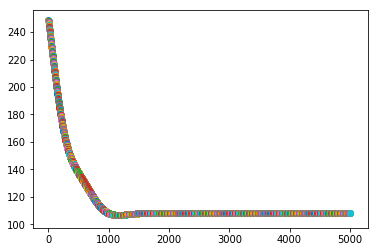

In [5]:
import numpy as np
from math import pow
import matplotlib.pyplot as plt
%matplotlib inline

def mf(R,P,Q,K):
    alpha = 0.0002
    beta = 0.02
    times = 5000
    eplison = 0.001
    result = []
    #将矩阵Q进行转置
    Q = Q.T
    #将生成的矩阵相乘
    for time in range(times):
        #求R尖的值
        for i in range(len(R)):
            for j in range(len(R[i])):
                eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                for k in range(K):
                    P[i][k] = P[i][k] + 2*alpha*eij*Q[k][j]
                    Q[k][j] = Q[k][j] + 2*alpha*eij*P[i][k]
        eR = np.dot(P,Q)
        #求eij的平方
        eij_2 = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                for k in range(K):
                    eij_2 = eij_2 + pow((R[i][j] - np.dot(P[i,:],Q[:,j])),2) + 0.5*beta*(pow(P[i][k],2))+pow(Q[k][j],2)
        result.append(eij_2)
        if eij_2 < eplison:
            break
    return P,Q.T,result 
        
    
    
def main():
    R = [
        [5,3,0,1],
        [4,0,0,1],
        [1,1,0,5],
        [1,0,0,4],
        [0,1,5,4]
    ]
    #将R列表转化为矩阵
    R = np.array(R)
    #获取该矩阵的大小
    N = len(R)
    M = len(R[0])
    
    print(N)
    print(M)
    ''' 
    如何预测缺失的评分呢？对于缺失的评分，可以转化为基于机器学习的回归问题，也就是连续值的预测，
    对于矩阵分解有如下式子，R是类似图1的评分矩阵，假设N*M维(N表示行数，M表示列数)，可以分解为P跟Q矩阵，
    其中P矩阵维度N*K，P矩阵维度K*M。
    对于P,Q矩阵的解释，直观上，P矩阵是N个用户对K个主题的关系，Q矩阵是K个主题跟M个物品的关系，至于K个
    主题具体是什么，在算法里面K是一个参数，需要调节的，通常10~100之间。
    '''
    K = 2
    P = np.random.rand(N,K)
    Q = np.random.rand(M,K)
    #调用矩阵分解的函数
    mf_P,mf_Q,result = mf(R,P,Q,K)
    print("原始矩阵:",R)
    mf_R = np.dot(mf_P,mf_Q.T)
    print("经过MF后:",mf_R)
    #做出图像
    for t in range(5000):
        plt.scatter(t,result[t])
    plt.show()
main()